In [ ]:
'''
We will need to make use of the following libraries
'''
import time
from matplotlib import pyplot as plt
import numpy as np
from random import randint

In [119]:
'''
The following functions are just some utilities to allow us to test how our algorithms perform
'''

'''
Accepts an input and a list of functions, runs through the 
'''
def profile(test_input, *functions):
    output_array = [0 for _ in functions]
    for i in range(len(functions)):
        start = time.time()
        functions[i](test_input)
        end = time.time()
        output_array[i] = end - start

    return output_array

'''
Generates an array of a given size with random integers
'''
def generate_input_array(n):
    return [randint(1, 20) for _ in range(n)]


def plot_results(x_axis, plots=[], plot_labels=[], plot_title = "Plot Title", x_label="X", y_label="Y"):
    fig = plt.figure(figsize=(15, 12))
    plt.title(plot_title, fontsize=20)
    plt.xlabel(x_label, fontsize=15)
    plt.ylabel(y_label, fontsize=15)
    for i in range(len(plots)):
        plt.plot(plots[i], label=plot_labels[i])

    plt.legend()
    plt.grid(b=True, color='DarkTurquoise', alpha=0.2, linestyle=':', linewidth=2)

    plt.show()

In [130]:
'''
Problem Statement:

Given an array of integers A, produce an array of integers B such that every member B[n]
is the product of all members of A except for A[n]

For example:

Input: [1, 2, 3]

Output: [6, 3, 2]


Input: [5, 10, 4]

Output: [40, 20, 50]

'''

'''
The naïve solution more or less takes the product statement at face value:

For each index of the input, loop through every element and multiply them all together
provided they are not the current index we are evaluating. This solution is
straightforward, but involves iterating over the entirety of the input array once
for each of it's elements. Leaving us with n operations for each of the n elements
in the input array.

Time Complexity:
O(n^2)

Space Complexity:
O(n)
'''
def naive_solution(input_array):
    output_array = [0 for _ in input_array]
    input_array_length = len(input_array)
    for i in range(input_array_length):
        product = 1
        for j in range(input_array_length):
            if (not i == j):
                product = product * input_array[j]
        output_array[i] = product
    return output_array

'''
This solution makes use of memoization of repeated work that is occuring in the naïve implementation.

A useful way to recontextualize the problem is to realize that at every step along the way we are
multiplying the product of all the numbers before are index by the product of all the numbers after our
index.

For example, take the array [2,3,4,5] and consider the products we are looking for at each step

Our output array will take the form of
[(1) * (3*4*5), (2)*(4*5), (2*3)*(5), (2*3*4)*(1)]

An important insight here is that we are repeatins of t multiplications here.
The product of the left side at each iteration will be the product of the left side
on the previous iteration times the newest element revealed by shifting our index to the right.

We can take advantage of this to pre-compute the left-hand and right-hand parts of the computation
ahead of time with a single pass through the array each.

Once this is done we can walk through and simply multiply the appropriate left-handed result
with the appropriate right-handed result to arrive at our answer in a more efficient way

For our previous example this looks something like:
lefts = [1, 2, 6, 24]
rights = [60, 20, 5, 1]
output = lefts[i] * rights[i] for each index i  in our input

Time Complexity:
O(n)

Space Complexity:
O(n)
'''
def efficient_solution(input_array):
    input_array_length = len(input_array)
    
    if input_array_length < 1: return []

    output_array = [0 for _ in input_array]
    left_products = [0 for _ in input_array]
    right_products = [0 for _ in input_array]
    
    left_products[0] = 1
    right_products[-1] = 1
        
    for i in range(1, input_array_length):
        left_products[i] = left_products[i - 1] * input_array[i-1]
        
    for i in range(input_array_length - 2, -1, -1):
        right_products[i] = right_products[i+1] * input_array[i+1]
        
    return [left_products[i] * right_products[i] for i in range(input_array_length)]

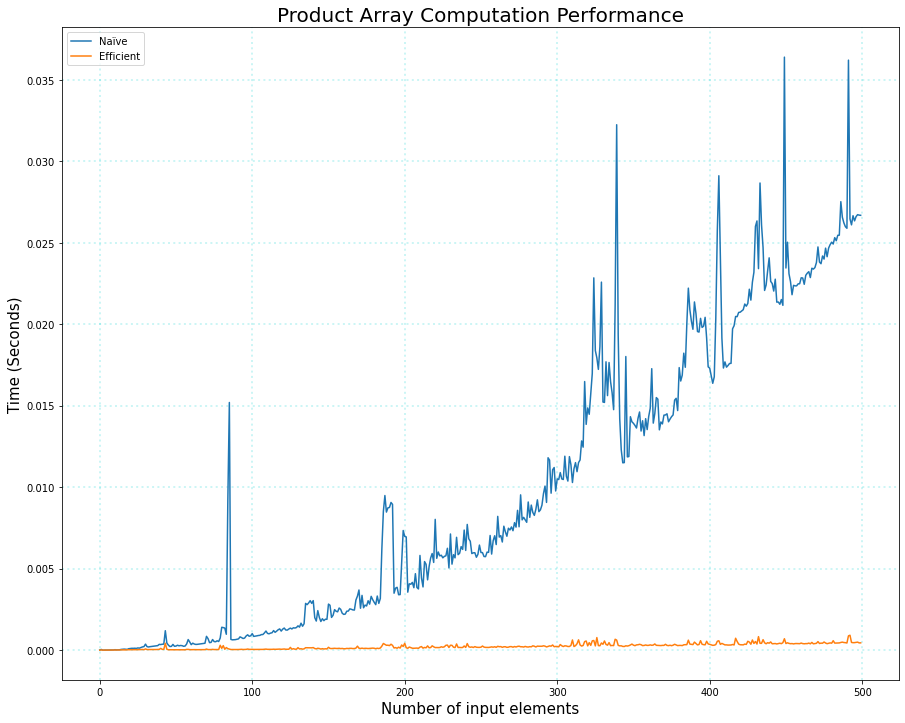

In [131]:
def generate_results(input_range):
    naive_results = []
    efficient_results = []
    
    for n in input_range:
        input_array = generate_input_array(n)
        [naive, efficient] = profile(input_array, naive_solution, efficient_solution)
        naive_results.append(naive)
        efficient_results.append(efficient)
        
    return [naive_results, efficient_results]

min_array_size = 0
max_array_size = 500
step = 1
array_size_range = range(min_array_size, max_array_size, step)

plots = generate_results(array_size_range)
plot_labels = ["Naïve", "Efficient"]
plot_results(
    array_size_range, 
    plots=plots,
    plot_labels=plot_labels,
    plot_title="Product Array Computation Performance",
    x_label="Number of input elements",
    y_label="Time (Seconds)"
)

In [127]:
'''
The fibonacci sequence is a series of numbers generated by the following rule:

fib(0) = fib(1) = 1
fib(n) = fib(n - 1) + fib(n - 2)

So the following represents the first few terms of the sequence

1, 1, 2, 3, 5, 8, 13, 21... etc.

Write a function to generate fibonacci
'''

'''
This is a naïve implementation of a function to generate the fibonacci sequence.
It follows directly from the problem statement, but it's runtime is abysmal

Runtime Complexity:
O(ϕ ^ n)

Space Complexity:
O(n)
-- Note that even though our tree of computations branches pretty wide,
   the computer is only going to process a single branch at a time, deallocating
   branches as it goes. So even though we are making O(ϕ ^ n) computations, we are
   doing some cleanup as we go to prevent the algorithm from computing that much space
'''
def naive_fib(n):
    if n <= 1:
        return 1
    return naive_fib(n - 1) + naive_fib(n - 2)

'''
This implementation represents an improvement over our naïve implementation.
We maintain the basic adherence to the problem statement and the recursive nature of the algorithm,
but we introduce an important optimization in the form of memoization.

As we compute values, we store them in a special variable called a memo before returning them.
Later, we can reference the values we have stored in this memo to replace expensive recomputation
with a very fast lookup.

Time Complexity:
O(n)

Space Complexity:
O(n)
'''
def better_fib(n):
    memo = [None for _ in range(n+1)]
    def helper(m):
        if memo[m] is not None:
            return memo[m]
        if m <= 1:
            return 1
        result = helper(m - 1) + helper(m - 2)
        memo[m] = result
        return result
    return helper(n)


'''
This implementation is not that different from the previous one, 
at least from a mathematical and time-centric point of view.

However, when the better_fib function runs, the computer needs to allocate a new
stack frame for every recursive call. In addition, we keep track of every
single value we have computed, even though we really only need to keep track of
the last two.

This implementation improves upon those points and the result is an algorithm
that treats the computers memory as kindly as it treats our time.

Time Complexity:
O(n)

Space Complexity
O(1)
'''
def best_fib(n):
    last_two_fibs = [1, 1]
    parity = 0
    for x in range(1, n):
        parity = parity ^ 1
        next_fib = sum(last_two_fibs)
        last_two_fibs[parity] = next_fib
    return last_two_fibs[parity]


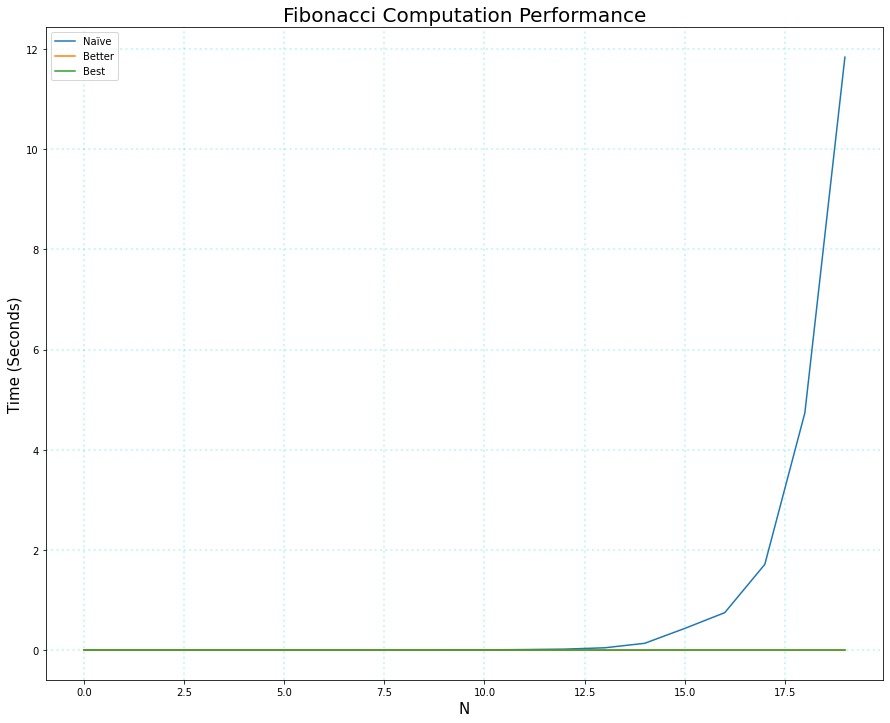

In [122]:
'''
Here we profile the different approaches and plot the results.
Notice that the naïve implementation gets out of hand so fast
that the difference between the better and best implementations
are imperceptible. 

In order to appreciate that there is any difference
at all, you need to comment out the parts invoking the naïve implementation
'''
min_fib = 0
max_fib = 40
step = 2

plot_range = range(min_fib, max_fib, step)

plots = [
    [profile(x, naive_fib) for x in plot_range],
    [profile(x, better_fib) for x in plot_range],
    [profile(x, best_fib) for x in plot_range]
]
    
plot_results(
    plot_range,
    plots=plots,
    plot_labels=["Naïve", "Better", "Best"],
    plot_title="Fibonacci Computation Performance",
    x_label="N",
    y_label="Time (Seconds)"
)
